CAPSTONE Three.

# Hate Speech and Offensive Language detection

## Pre-processing and Training Data Development, Modeling

## Introduction

Text classification is one of the major problems people are now days looking to solve. We will use supervised machine learning algoritms and NLP modeling for our hate-speech detection research; we will be using Twitter data. 
The text is already classified as: 
 * hate-speech, 
 * offensive language, 
 * and neither. 

Word embeddings (algorithm for obtaining vector representations for words)
  - Supervised with NLP - bag of words of models od tf-ids features
  - Unsupervised learning GloVe.

- Use Multinomial Naive Bayes algorithm is a probabilistic learning method 
- Random Forest
- 
- Use Bert in multi label Text Classification

## Imports

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from scipy import stats
# random enables us to generate random numbers
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split



In [6]:
from sklearn import tree, metrics
from io import StringIO
from IPython.display import Image  
import pydotplus

from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report


In [7]:

import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
#from bs4 import BeautifulSoup
import unicodedata

from nltk.tokenize import TweetTokenizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
import sys
import torch

from torch import nn

##  Load the data

In [9]:
from google.colab import files


uploaded = files.upload()


Saving labeled_data.csv to labeled_data.csv


Load the Hate Speach and Offensive language dataset (labeled_data.csv)

In [10]:
hate_speach = pd.read_csv('labeled_data.csv')

In [11]:
hate_speach

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [12]:
hate_speach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [13]:
hate_speach.shape

(24783, 7)

 # 4. Pre-processing and Training Data Development

The text is classified as: hate-speech, offensive language, and neither.
* hate speech it is labelled as 0
* offensive it is labelled as 1
* neither then it is class 2

The dataset has 7 columns. We will drop all the columns that contailn numbers of CF users who judged the tweet and keep only 2 columns: the tweet and class

In [14]:
hs = hate_speach[['class', 'tweet']]
hs

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [15]:
# Grouping data by label
hs.groupby('class').count()

,tweet
class,
0,1430
1,19190
2,4163


In [16]:
 def percentage(part, whole):
  Percentage = round(100 * float(part)/float(whole),2)
  return str(Percentage) + "%"

In [17]:
hate, offensive, neither = np.bincount(hs['class'])
whole = hate + offensive + neither


In [18]:
hate_pr = percentage(hate,whole)
offensive_pr = percentage(offensive,whole)
neither_pr = percentage(neither,whole)

In [19]:
print("Total : " + str(whole))
print()
print("Hate : " + hate_pr + " of total")
print("Offensive : " + offensive_pr + " of total")
print("Neither : " + neither_pr + " of total")

Total : 24783

Hate : 5.77% of total
Offensive : 77.43% of total
Neither : 16.8% of total


This is an unbalanced dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


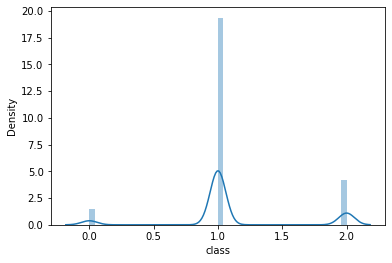

In [20]:
import seaborn as sn
sn.distplot(hs['class'])
plt.show()

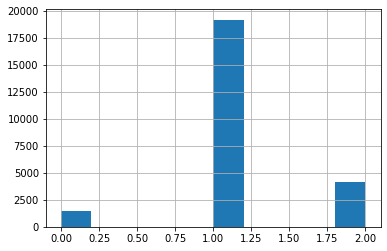

In [21]:
hs['class'].hist()

### 4.1 Create dummy or indicator features for categorical variables

In [22]:
tweet = hs.drop('class', axis=1)
categories = hs['class']

Although some machine learning algorithms can interpret multi-level categorical variables, many machine learning models cannot handle categorical variables unless they are converted to dummy variables.

In [23]:
cat = pd.get_dummies(categories)

where hate speech it is labelled as 0, offensive it is labelled as 1 
neither then it is class 2

In [24]:
cat.describe()

,0,1,2
count,24783.000000,24783.000000,24783.000000
mean,0.057701,0.774321,0.167978
std,0.233182,0.418037,0.373854
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [25]:
df = pd.concat([hs.drop("class", axis=1), pd.get_dummies(categories)], axis=1)
df

,tweet,0,1,2
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,0,1
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0,1,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0,1,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0,1,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0,1,0
...,...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0,1,0
24779,"you've gone and broke the wrong heart baby, an...",0,0,1
24780,young buck wanna eat!!.. dat nigguh like I ain...,0,1,0
24781,youu got wild bitches tellin you lies,0,1,0


## Preprocessing of the tweets

* Removal of punctuation and capitlization
* Tokenizing
* Removal of stopwords
* Stemming

In [26]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [27]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>@')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


In [28]:
df['cleanTweet']=df['tweet'].map(lambda s:preprocess(s)) 
tweet_tokenizer = TweetTokenizer()
df['tokenized_tweets'] = df['cleanTweet'].apply(tweet_tokenizer.tokenize)
df

,tweet,0,1,2,cleanTweet,tokenized_tweets
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,0,1,mayasolovely woman complain cleaning house amp...,"[mayasolovely, woman, complain, cleaning, hous..."
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0,1,0,mleew boy dats cold tyga dwn bad cuffin dat ho...,"[mleew, boy, dats, cold, tyga, dwn, bad, cuffi..."
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0,1,0,urkindofbrand dawg sbabylife ever fuck bitch s...,"[urkindofbrand, dawg, sbabylife, ever, fuck, b..."
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0,1,0,c_g_anderson viva_based look like tranny,"[c_g_anderson, viva_based, look, like, tranny]"
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0,1,0,shenikaroberts shit hear might true might fake...,"[shenikaroberts, shit, hear, might, true, migh..."
...,...,...,...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0,1,0,muthaf lie lifeasking _pearls corey_emanuel ri...,"[muthaf, lie, lifeasking, _pearls, corey_emanu..."
24779,"you've gone and broke the wrong heart baby, an...",0,0,1,gone broke wrong heart baby drove redneck crazy,"[gone, broke, wrong, heart, baby, drove, redne..."
24780,young buck wanna eat!!.. dat nigguh like I ain...,0,1,0,young buck wanna eat dat nigguh like aint fuck...,"[young, buck, wanna, eat, dat, nigguh, like, a..."
24781,youu got wild bitches tellin you lies,0,1,0,youu got wild bitches tellin lies,"[youu, got, wild, bitches, tellin, lies]"


In [29]:
df = df.drop("tweet", axis=1)
df

,0,1,2,cleanTweet,tokenized_tweets
0,0,0,1,mayasolovely woman complain cleaning house amp...,"[mayasolovely, woman, complain, cleaning, hous..."
1,0,1,0,mleew boy dats cold tyga dwn bad cuffin dat ho...,"[mleew, boy, dats, cold, tyga, dwn, bad, cuffi..."
2,0,1,0,urkindofbrand dawg sbabylife ever fuck bitch s...,"[urkindofbrand, dawg, sbabylife, ever, fuck, b..."
3,0,1,0,c_g_anderson viva_based look like tranny,"[c_g_anderson, viva_based, look, like, tranny]"
4,0,1,0,shenikaroberts shit hear might true might fake...,"[shenikaroberts, shit, hear, might, true, migh..."
...,...,...,...,...,...
24778,0,1,0,muthaf lie lifeasking _pearls corey_emanuel ri...,"[muthaf, lie, lifeasking, _pearls, corey_emanu..."
24779,0,0,1,gone broke wrong heart baby drove redneck crazy,"[gone, broke, wrong, heart, baby, drove, redne..."
24780,0,1,0,young buck wanna eat dat nigguh like aint fuck...,"[young, buck, wanna, eat, dat, nigguh, like, a..."
24781,0,1,0,youu got wild bitches tellin lies,"[youu, got, wild, bitches, tellin, lies]"


### Save clean tweens in a new file

In [30]:
#df.to_csv('../data/clean_tweets.csv') 

In [31]:
hs = hs.assign(cleanTweet=hs['tweet'].map(lambda s:preprocess(s))) 


In [32]:
hs = hs.drop("tweet", axis=1)
hs

,class,cleanTweet
0,2,mayasolovely woman complain cleaning house amp...
1,1,mleew boy dats cold tyga dwn bad cuffin dat ho...
2,1,urkindofbrand dawg sbabylife ever fuck bitch s...
3,1,c_g_anderson viva_based look like tranny
4,1,shenikaroberts shit hear might true might fake...
...,...,...
24778,1,muthaf lie lifeasking _pearls corey_emanuel ri...
24779,2,gone broke wrong heart baby drove redneck crazy
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitches tellin lies


In [33]:
hs.rename(columns={'class' : 'label'}, inplace=True)


### 4.2. Standardize the magnitude of numeric features

This is not applied in our situation. We don't have numeric features with different magnitude. 

## Visualization . Word Clouds 

Word Clouds are a popular way of displaying how important words are in a collection of texts. 
The more frequent the word is, the greater space it occupies in the image. 

### Offensive language

<class 'set'>


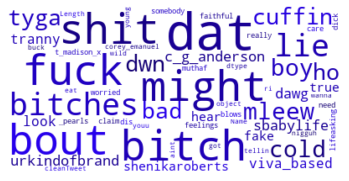

In [34]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("RT")

print(type(STOPWORDS))

import random

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 250
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(hs.loc[hs["label"]==1].cleanTweet))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

### Hate language

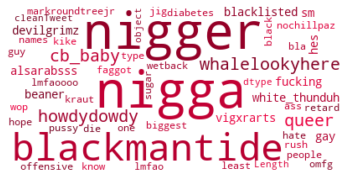

In [35]:
stopwords.add("Name")

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str((hs.loc[hs["label"]==0].cleanTweet)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

### Neither


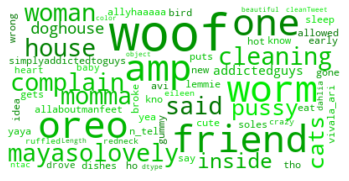

In [36]:
stopwords.add("Name")

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 120
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str((hs.loc[hs["label"]==2].cleanTweet)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

# 5 Modeling

### Word embeddings

#### Bag of words and Tf-idf

Use Bag-of-words vectors (build in scikit-learn) to predict the text label(category) based on the tweets wording.

The data set we extracted has categorical features we generated using preprocessing

The BoW method is simple and works well, but it treats all words equally and cannot distinguish very common words or rare words. Tf-idf solves this problem of BoW Vectorization.

Both Vectorization techniques, BoW and tf-idf work well but it fails to suggest a relation between two words. Vectorization using word embedding solves this problem. We will discuss word embedding 

In [37]:
hs
#hs.groupby('label').count()

,label,cleanTweet
0,2,mayasolovely woman complain cleaning house amp...
1,1,mleew boy dats cold tyga dwn bad cuffin dat ho...
2,1,urkindofbrand dawg sbabylife ever fuck bitch s...
3,1,c_g_anderson viva_based look like tranny
4,1,shenikaroberts shit hear might true might fake...
...,...,...
24778,1,muthaf lie lifeasking _pearls corey_emanuel ri...
24779,2,gone broke wrong heart baby drove redneck crazy
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitches tellin lies


In [38]:
#target
y = hs.label

In [39]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hs["cleanTweet"], y,test_size=0.25, random_state=0)

#### CountVectorizer for text classification

In [40]:
count_vectorizer = CountVectorizer(stop_words="english")

In [41]:
# Transform the training data using only the 'tweet' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

#### TfidfVectorizer for text classification

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


### Inspecting the vectors

In [43]:
# tfidf_vectorizer the first 10 features
tfidf_vectorizer.get_feature_names()[:10]

['___',
 '____',
 '_____',
 '______',
 '_______',
 '__________',
 '_____________',
 '_______o______',
 '_____al',
 '_____redd']

In [44]:
# The first 5 vectors of the tfidf training data
tfidf_train.A[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Create the CountVectorizer and TfidfVectorizer dataframes

In [45]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names() )

#### CountVectorizer

In [46]:
count_df.head()

,___,____,_____,______,_______,__________,_____________,_______o______,_____al,_____redd,____aaliyah____,____chelleeee,____lilrambo,____quinn,___asiaj,___bria,___jazsy,___kd_,___legacy,___michiganmade,___nisha,___royals,___tamm,__adamdavis,__angieex,__ashlaaay,__austinnn,__bino,__bj_,__black_jesus,__brat_,__brighterdays,__brionnanicole,__c_h_i_n_g__,__chuuu_,__cocainecowboy,__dattootiegurl,__dev,__diaryofaboss,__dutch,...,zlyouell,zmbiedance,zneezygood,zodiac,zoe,zoebarton,zoejoiner,zoepassion,zog,zohdaa,zombie,zombies,zone,zoned,zonedmoan,zoneing,zonozi,zoo,zoom,zoomed,zooyorkinit,zorro,zp_,zramsin,zrastall,zrawtaroli,zrgrizz,zt_supreme,ztmm,zubiaa_o,zuko,zulema,zvckslvtr,zwengersierra,zwhite,zwithr,zzachbarness,zzzentropy,zzzquil,zzzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### TfidfVectorizer

In [47]:
tfidf_df.head()

,___,____,_____,______,_______,__________,_____________,_______o______,_____al,_____redd,____aaliyah____,____chelleeee,____lilrambo,____quinn,___asiaj,___bria,___jazsy,___kd_,___legacy,___michiganmade,___nisha,___royals,___tamm,__adamdavis,__angieex,__ashlaaay,__austinnn,__bino,__bj_,__black_jesus,__brat_,__brighterdays,__brionnanicole,__c_h_i_n_g__,__chuuu_,__cocainecowboy,__dattootiegurl,__dev,__diaryofaboss,__dutch,...,zlyouell,zmbiedance,zneezygood,zodiac,zoe,zoebarton,zoejoiner,zoepassion,zog,zohdaa,zombie,zombies,zone,zoned,zonedmoan,zoneing,zonozi,zoo,zoom,zoomed,zooyorkinit,zorro,zp_,zramsin,zrastall,zrawtaroli,zrgrizz,zt_supreme,ztmm,zubiaa_o,zuko,zulema,zvckslvtr,zwengersierra,zwhite,zwithr,zzachbarness,zzzentropy,zzzquil,zzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculate the difference in columns

In [48]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

### Check whether the DataFrames are equal

In [49]:
count_df.equals(tfidf_df)

False

In [50]:
hs

,label,cleanTweet
0,2,mayasolovely woman complain cleaning house amp...
1,1,mleew boy dats cold tyga dwn bad cuffin dat ho...
2,1,urkindofbrand dawg sbabylife ever fuck bitch s...
3,1,c_g_anderson viva_based look like tranny
4,1,shenikaroberts shit hear might true might fake...
...,...,...
24778,1,muthaf lie lifeasking _pearls corey_emanuel ri...
24779,2,gone broke wrong heart baby drove redneck crazy
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitches tellin lies


## Naive Bayes model

Commonly used when training a new supervised model using text vector data


#### Train and test a Naive Bayes model using the CountVectorizer data.

In [51]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)



#### Calculate the accuracy score

In [52]:
score = metrics.accuracy_score(y_test, pred)
score

0.8700774693350549

#### Calculate the confusion matrix

In [53]:
cm = metrics.confusion_matrix(y_test,pred, labels=[0, 2])
cm

array([[ 18,  32],
       [  3, 642]])

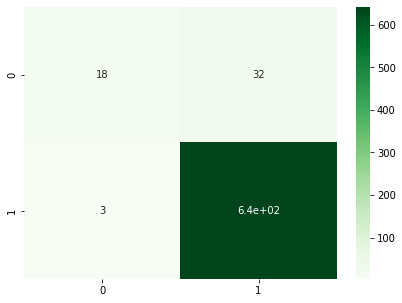

In [54]:
plt.figure(figsize = (7,5))

sns.heatmap(cm, annot=True, cmap ='Greens')

#### Train and test a Naive Bayes model using the TfidfVectorizer

In [55]:
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)


In [56]:
# Calculate the accuracy score
accuracy = metrics.accuracy_score(y_test, pred)
accuracy

0.7995480955455132

In [57]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 2])
cm

array([[  0,   3],
       [  0, 159]])

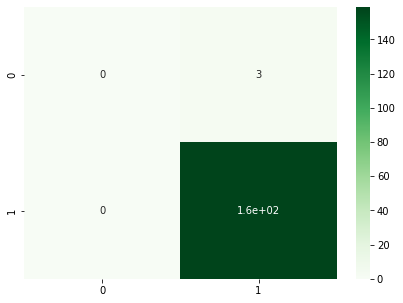

In [58]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap ='Greens')

## Classification with Random Forest

The random forest algorithm works by completing the following steps:

    * select random samples from the dataset provided.
    * create a decision tree for each sample selected. Then it will get a prediction result from each decision tree created.
    * voting will then be performed for every predicted result. For a classification problem, it will use mode, and for a regression problem, it will use mean.
    * select the most voted prediction result as the final prediction.

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
X_train, X_test, y_train, y_test = train_test_split(hs["cleanTweet"], y,test_size=0.25, random_state=0)

In [61]:
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(count_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [62]:
y_pred_rf = classifier_rf.predict(count_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[  90,  229,   40],
       [ 116, 4554,  130],
       [   8,  135,  894]])

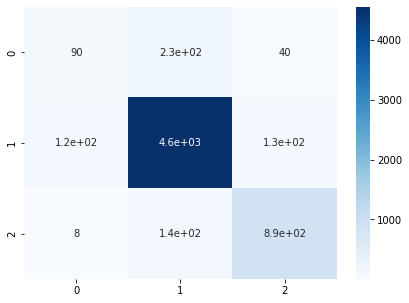

In [63]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap ='Blues')

In [64]:
accuracy = metrics.accuracy_score(y_test, y_pred_rf)
accuracy

0.89380245319561

# Deep neural network for hate speech detection

In [65]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [110]:
df

,0,1,2,cleanTweet,tokenized_tweets
0,0,0,1,mayasolovely woman complain cleaning house amp...,"[mayasolovely, woman, complain, cleaning, hous..."
1,0,1,0,mleew boy dats cold tyga dwn bad cuffin dat ho...,"[mleew, boy, dats, cold, tyga, dwn, bad, cuffi..."
2,0,1,0,urkindofbrand dawg sbabylife ever fuck bitch s...,"[urkindofbrand, dawg, sbabylife, ever, fuck, b..."
3,0,1,0,c_g_anderson viva_based look like tranny,"[c_g_anderson, viva_based, look, like, tranny]"
4,0,1,0,shenikaroberts shit hear might true might fake...,"[shenikaroberts, shit, hear, might, true, migh..."
...,...,...,...,...,...
24778,0,1,0,muthaf lie lifeasking _pearls corey_emanuel ri...,"[muthaf, lie, lifeasking, _pearls, corey_emanu..."
24779,0,0,1,gone broke wrong heart baby drove redneck crazy,"[gone, broke, wrong, heart, baby, drove, redne..."
24780,0,1,0,young buck wanna eat dat nigguh like aint fuck...,"[young, buck, wanna, eat, dat, nigguh, like, a..."
24781,0,1,0,youu got wild bitches tellin lies,"[youu, got, wild, bitches, tellin, lies]"


Tweets cannot be directly interpreted we need to transform them in a sequence of meaningful integer number in order to be analyzed by NN model

## GloVe Word Embeddings with Keras

In [67]:
from scipy import spatial
from sklearn.manifold import TSNE

Loading Glove Pre-trained Word Embedding Model from Text File


GloVe embeddings were trained on a dataset of one billion words with a vocabulary of 400 thousand words. There are few different embedding vector sizes such as 50, 100, 200 and 300 dimensions. We use 50 dimentions vector

In [68]:
from google.colab import files
uploaded = files.upload()

Saving glove.6B.50d.txt to glove.6B.50d (1).txt


In [69]:
from keras.preprocessing.text import Tokenizer

In [70]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.cleanTweet)
print('Found %d unique words.' % len(tokenizer.word_index))

Found 31203 unique words.


In [71]:
X = tokenizer.texts_to_sequences(df.cleanTweet)
X[:5] # first 5 elements of the X 

[[12228, 246, 880, 3455, 179, 15, 23, 74, 68, 13],
 [7882, 112, 1032, 422, 1076, 7883, 22, 2249, 69, 6, 387],
 [5955, 610, 857, 80, 9, 1, 164, 440, 858, 10],
 [1228, 987, 3063, 3456, 1033, 27, 3, 541],
 [12229, 10, 393, 203, 372, 203, 5956, 1, 158]]

In [74]:
y = df[2] # column 2 - no hate or offensive language (0s - hate or offensive language)
y.shape

(24783,)

In [76]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
print(X[0])
print(X[1])
print()
print("Max lenght of X")
max_length = max([len(s) for s in X]) #maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence
print(max_length)
print()
padded_seq = pad_sequences(X,maxlen=max_length,padding='post')
print(padded_seq[0])
print(padded_seq[1])


[12228, 246, 880, 3455, 179, 15, 23, 74, 68, 13]
[7882, 112, 1032, 422, 1076, 7883, 22, 2249, 69, 6, 387]

Max lenght of X
24

[12228   246   880  3455   179    15    23    74    68    13     0     0
     0     0     0     0     0     0     0     0     0     0     0     0]
[7882  112 1032  422 1076 7883   22 2249   69    6  387    0    0    0
    0    0    0    0    0    0    0    0    0    0]


Preparing Training and Test dataset

In [78]:
padded_seq,y = np.array(padded_seq),np.array(y)

X_train,X_test,Y_train,Y_test = train_test_split(padded_seq,y,test_size=0.25,stratify=y)

In [84]:
print (X_train.shape)
print(y_train.shape)
print (X_test.shape)
print(y_test.shape)

(18587, 24)
(18587,)
(6196, 24)
(6196,)


In [98]:
MAX_NUM_WORDS = 100000
EMBEDDING_DIM = 50
MAX_SEQUENCE_LENGTH = 200
VALIDATION_SPLIT = 0.2
word_index = tokenizer.word_index

len(word_index)


31203

In [99]:
test_data = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
test_data.shape 

(18587, 200)

In [100]:
embeddings_index = dict()
f = open('glove.6B.50d.txt',mode='rt',encoding='utf-8')
import numpy as np
for line in f:
    values = line.split()
    words = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[words] = coefs
f.close()
print('Loaded word vectors',len(embeddings_index)) #Loaded word vectors 400000

Loaded word vectors 400000


In [101]:


# prepare embedding matrix - rows are the words from word_index, columns are the embeddings of that word from glove.
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector



In [102]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.94415998, -0.30311999, -0.20235001, ..., -1.05350006,
         0.58445001,  0.71354002],
       [-0.13101   , -0.20428   , -0.62955999, ..., -0.84228998,
        -0.49031001,  0.11032   ],
       ...,
       [-0.15861   ,  0.47294   , -0.11118   , ..., -0.64332002,
         0.12794   ,  1.07009995],
       [ 0.16339999,  0.53283   , -0.66540003, ..., -1.20159996,
         0.31439999, -0.12135   ],
       [-0.32337999, -0.67427999, -0.41141999, ..., -0.55097002,
         0.65728003,  0.47944   ]])

In [103]:
embedding_matrix.shape

(31204, 50)

## Simple NN model

After the  pre-processing, the final dataset is ready to be analyzed. Due to the low dimensionality of the dataset, a simple NN model, with just an LSTM layer with 10 hidden units, will suffice the task:

In [104]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.initializers import Constant

# specify the maximum input length to the Embedding layer.
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32') 

# load these pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
print("Preparing of embedding matrix is done")

Preparing of embedding matrix is done


In [105]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM


In [116]:
rnnmodel = Sequential()
#rnnmodel.add(Embedding(MAX_NUM_WORDS, 128))
rnnmodel.add(embedding_layer)
rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
rnnmodel.add(Dense(2, activation='sigmoid'))
rnnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [119]:
rnnmodel.fit(X_train, Y_train,
          batch_size=32, 
          epochs=1,
          validation_split=0.2)

score, acc = rnnmodel.evaluate(X_test, Y_test,
                            batch_size=32)
print('Test accuracy with RNN:', acc)

ValueError: ignored